# New York AIRBNB - DATA EXPLORATION
This project comprises of data exploration,hypothesis testing and machine learning on an open data set of New York City Airbnb. We plan to obtain relevant insights from datasets  that will be used to evaluate how the proximity to ***important landmarks/ tourist sights*** affect the listing price and number of listings in each borough.
For this purpose we will be using a supplementary dataset listed below:

1) https://data.cityofnewyork.us/Housing-Development/Individual-Landmark-Sites/ts56-fkf5

The above listed dataset consists of Landmarks in New York and their locations.

Methods we have used:

1) Data Preprocessing

2) Feature Engineering

3) Hypothesis Testing

4) Machine Learning 

     *  Decision Tree Classifier
     *  Cross validation
     *  k-Nearest Neighbour Classifier




## **Extracting information from our Primary data set**

###Mounting Drive to access our files
---

In [ ]:
  
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

path_prefix = "/content/drive/My Drive"

Mounted at /content/drive


###Importing necessery libraries for future analysis of the dataset
---


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
from os.path import join

###Opening Primary dataset - NEW YORK AIRBNB
---

In [ ]:
fname = "AB_NYC_2019.csv"
df = pd.read_csv(join(path_prefix, fname))



###Displaying the first 5 Entries
---

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### THE NUMBER OF TOTAL AIRBNB/DATA INFO

---

This number represents the total number of rows in the data set.Each row represents a unique Airbnb along with its detailed descrption.
Hence,in this data set we are dealing with 48895 Airbnbs.

In [ ]:
df.shape[0]

48895

###Description of data type of each column
---

This output summarizes the information provided for each Airbnb including that can be examined in the project later.

In [ ]:
df.dtypes


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

###Checking NaN Values

In [ ]:
df.isnull().sum() 

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

We can see that there are NaN values in name, host_name, last_review and reviews_per_month.
But because we are not going to be using any of the above stated columns we do not drop these values.

###Grouping Neighnourhoods Distinctly
---

The following output finds the unique values of the five major boroughs/Neighbourhood groups in NYC.


In [ ]:
Hoods= df.neighbourhood_group.unique()
Hoods

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

####ScatterPlot

Scatter plot based on unique neighbourhood groups


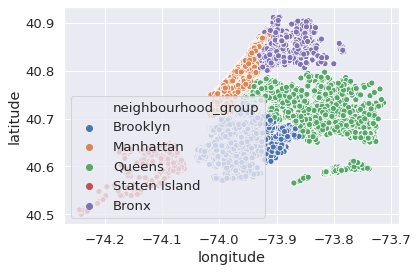

In [ ]:
sns.set_style("darkgrid")
sns.scatterplot(x="longitude", y="latitude", hue="neighbourhood_group", data=df,size_order=10 )

##Extracting price information

Investingating price with respect to other variables and their relation.

### Seperating all Airbnbs into above stated groups regarding price

---



The following code creates lists of prices of all Airbnbs based on the the neighbourhood groups they belong to:


In [ ]:
BK=[]
MN=[]
QN=[]
SI=[]
BR=[]


for i in range(df.shape[0]):
  if (df.iloc[i,4] == "Brooklyn"):
      price = df.iloc[i,9]
      BK.append(price)
  elif(df.iloc[i,4] == "Manhattan"):
      price = df.iloc[i,9]
      MN.append(price)
  elif (df.iloc[i,4] == "Queens"):
      price = df.iloc[i,9]
      QN.append(price)
  elif (df.iloc[i,4] == "Staten Island"):
      price = df.iloc[i,9]
      SI.append(price)
  elif (df.iloc[i,4] == "Bronx"):
      price = df.iloc[i,9]
      BR.append(price)




###Calculating Average of prices per Neighbourhood
--- 

The following code finds the average prices of each price list created above based on the neighbourhood groups.
It then creates an other list containing averages of each neigbourhood as tabulated below( values in the table are rounded up).

In [ ]:
def average(lista):
  sums = 0
  avg = 0
  l = len(lista)
  for i in lista:
    sums = sums+i
  avg = sums/l
  return avg

ALL_avg =[]
ALL_avg.append(average(BK))
ALL_avg.append(average(MN))
ALL_avg.append(average(QN))
ALL_avg.append(average(SI))
ALL_avg.append(average(BR))

ALL_avg





[124.38320732192598,
 196.8758136743456,
 99.51764913519237,
 114.81233243967829,
 87.4967919340055]

|NEIGHBOURHOODS     | AVERAGE    |
|--- | --- |
|Brooklyn   | 124.38     |
|Manhattan  | 196.88     |
|Queens     | 99.52      |
|Staten Island  | 114.81     |
|Bronx    | 87.49      |

###Calculating Number of listings per Neighbourhood
--- 

The following code aims to calculate the total number of listings in each neighbourhood.It creates a list of id values for each neighbourhood.Then it calculates the size of the list to provide the number of listings, which are then appended to the another list displayed as the output.
All the findings from this code are tabulated below.

In [ ]:
BK_listings=[]
MN_listings=[]
QN_listings=[]
SI_listings=[]
BR_listings=[]


for i in range(df.shape[0]):
  if (df.iloc[i,4] == "Brooklyn"):
      ids= df.iloc[i,0]
      BK_listings.append(ids)
  elif(df.iloc[i,4] == "Manhattan"):
      ids = df.iloc[i,0]
      MN_listings.append(ids)
  elif (df.iloc[i,4] == "Queens"):
      ids= df.iloc[i,0]
      QN_listings.append(ids)
  elif (df.iloc[i,4] == "Staten Island"):
      ids = df.iloc[i,0]
      SI_listings.append(ids)
  elif (df.iloc[i,4] == "Bronx"):
      ids = df.iloc[i,0]
      BR_listings.append(ids)

def total(listings):
  return len(listings)

Num_listings_each =[]
B=total(BK_listings)
M=total(MN_listings)
Q=total(QN_listings)
S=total(SI_listings)
X=total(BR_listings)
Num_listings_each.append(B)
Num_listings_each.append(M)
Num_listings_each.append(Q)
Num_listings_each.append(S)
Num_listings_each.append(X)
Num_listings_each
  


[20104, 21661, 5666, 373, 1091]

|NEIGHBOURHOODS     | Number Of Listings  |
|--- | --- |
|Brooklyn   | 20104   |
|Manhattan  | 21661   |
|Queens     | 5666      |
|Staten Island  | 373     |
|Bronx    | 1091     |

####Visualisation of our Calculations
---

The following bar charts display the relationship between:

1) The average prices and neighbourhood group (in black)

2) The number of listing and the neighbourhood group( in pink)

The data represented in each bar graph was calculated above.The exact values are tabulated below for reference.

|NEIGHBOURHOODS     | Number of Listings    | Average Price |
|--- | --- | ---|
|Brooklyn   | 20104    | 124.34 |
|Manhattan  | 21661    |196.88|
|Queens     | 5666     |99.52|
|Staten Island  | 373     |114.81
|Bronx    | 1091   |87.50|

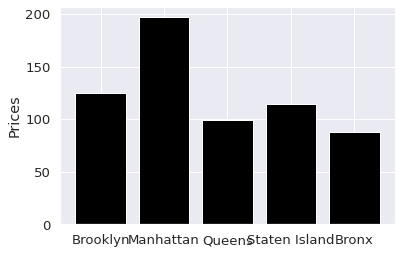

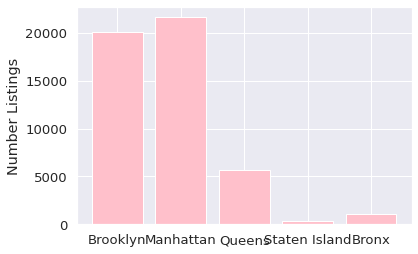

In [ ]:
ydata = ALL_avg
xdata =["Brooklyn", "Manhattan", "Queens", "Staten Island", "Bronx"]
plt.bar(xdata,ydata, color='black') 

plt.ylabel("Prices") 
plt.show()

ydata = Num_listings_each
xdata =["Brooklyn", "Manhattan", "Queens", "Staten Island", "Bronx"]
plt.bar(xdata,ydata, color='pink') 

plt.ylabel("Number Listings") 
plt.show()

From the above statistics,it can be deduced that:

1) Manhattan has the highest number of listings, followed by Brooklyn.

2) The average prices of Airbnbs is also the highest in Manhattan.

3)Although there isn't a significant difference between the number of listings of Manhattan and Brooklyn,the average prices of both differ greatly.

### Categorising Prices





The following code categorizes Airbnbs based on different price gropus
as follows:

1)Cheap

2)Affordable

3)Expensive

4)Luxurious
And creates a new column "Price Category" in the data frame.

In [ ]:
def price_categories(price):
  if ((0 <= price) and (price <= 30)):
    c = "Cheap"
    return c
  elif ((31 <= price) and (price <= 100)):
    A="Affordable"
    return A
  elif (( 101<= price)) and ((price <=500)):
    e="Expensive"
    return e
  elif (price>=501):
    l ="Luxurious"
    return l

price_cat = []
for k in range( df.shape[0]):
  catg= price_categories(df.iloc[k,9])
  price_cat.append(catg)
df["Price Category "]= price_cat
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Price Category
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Expensive
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Expensive
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,Expensive
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Affordable
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Affordable


Creating a contingency table of the columns `neighbourhood_group` and`Price Category`

In [ ]:
Price_vs_borough= pd.crosstab(df["neighbourhood_group"], df["Price Category "])
Price_vs_borough

Price Category,Affordable,Cheap,Expensive,Luxurious
neighbourhood_group,,,,
Bronx,798,67,219,7
Brooklyn,11428,343,8104,229
Manhattan,6846,75,13967,773
Queens,3943,158,1536,29
Staten Island,254,16,97,6


####Bar Chart

Plotting a histogram using the above contingency table to show the comparison between each neigbourbood group and price categories.


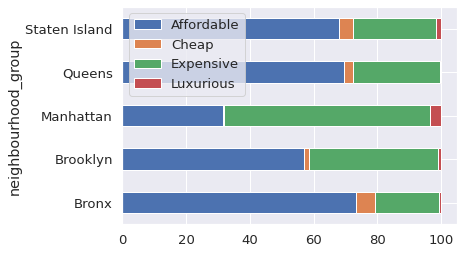

In [ ]:
norm =Price_vs_borough.div(Price_vs_borough.sum(axis=1),axis=0)
norm= norm*100

norm.plot.barh(stacked=True,legend=True)
plt.legend()
plt.show()

####ScatterPlot

Scatter plot based on unique price categorizes 


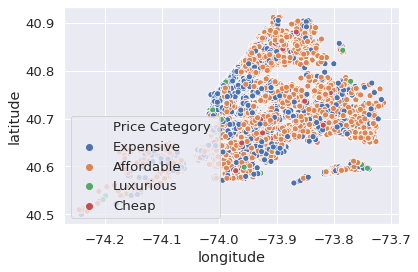

In [ ]:
sns.set_style("darkgrid")
sns.scatterplot(x="longitude", y="latitude", hue="Price Category ", data=df,size_order=9)

###Categorising the Listings based on No. of Reviews

The following code categorizes Airbnbs based on different number of reviews as follows:

1)Low Rated

2)Average

3)Good

4)Excellent
And creates a new column `Review Category` in the data frame.

In [ ]:
def review_categories(r):
  if ((0 <= r) and (r <= 1)):
    Low= "Low Rated"
    return Low
  elif ((2<= r) and (r <=30)):
    Aveg="Average"
    return Aveg
  elif ((31<= r)) and ((r <=70)):
    et="Good"
    return et
  elif (r>=71):
    l ="Excellent"
    return l

review_cat = []
for x in range( df.shape[0]):
  cati= review_categories(df.iloc[x,11])
  review_cat.append(cati)
df["Review Category "]= review_cat
df.head(4)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Price Category,Review Category
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Expensive,Average
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Expensive,Good
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,Expensive,Low Rated
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Affordable,Excellent


Creating a contingency table of the columns `Review Category` and `Price Category`

In [ ]:
Reviews_vs_price= pd.crosstab(df["Review Category "], df["Price Category "])
Reviews_vs_price

Price Category,Affordable,Cheap,Expensive,Luxurious
Review Category,,,,
Average,11075,324,11469,395
Excellent,2417,44,2381,32
Good,2789,55,2542,76
Low Rated,6988,236,7531,541


Plotting a histogram using the above contingency table to show the comparison between each review category and price category
.

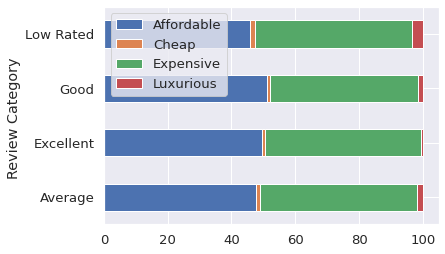

In [ ]:
norml =Reviews_vs_price.div(Reviews_vs_price.sum(axis=1),axis=0)
norml= norml*100

norml.plot.barh(stacked=True,legend=True)
plt.legend()
plt.show()

####ScatterPlot

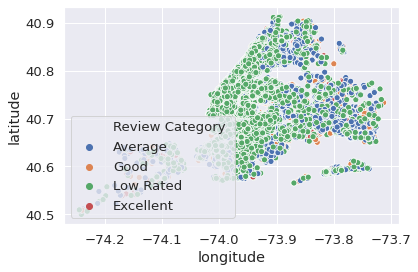

In [ ]:
sns.set_style("darkgrid")
sns.scatterplot(x="longitude", y="latitude", hue="Review Category ", data=df,size_order =9 )

### Room Types and Prices

Extracting unique room types from data

In [ ]:
Room_type= df.room_type.unique()
Room_type

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

### Room Types vs Price Category

Calculating the number of Airbnbs in each room type category based on their price categories.

The results are tabulated below.

In [ ]:
Afford_priv=0
cheap_priv=0
exp_priv=0
lux_priv=0

Afford_ent=0
cheap_ent=0
exp_ent=0
lux_ent=0

Afford_sh=0
cheap_sh=0
exp_sh=0
lux_sh=0

for i in range(df.shape[0]):
  if (df.iloc[i,8] == "Private room"):
    if(df.iloc[i,16] =="Affordable"):
      Afford_priv+=1
    elif(df.iloc[i,16] =="Cheap"):
      cheap_priv+=1
    elif(df.iloc[i,16]=="Expensive"):
      exp_priv+=1
    elif(df.iloc[i,16]=="Luxurious"):
      lux_priv+=1
  elif (df.iloc[i,8] == "Entire home/apt"):
    if(df.iloc[i,16]=="Affordable"):
      Afford_ent+=1
    elif(df.iloc[i,16] =="Cheap"):
      cheap_ent+=1
    elif(df.iloc[i,16] =="Expensive"):
      exp_ent+=1
    elif(df.iloc[i,16] =="Luxurious"):
      lux_ent+=1
  elif (df.iloc[i,8] == "Shared room"):
    if(df.iloc[i,16] =="Affordable"):
      Afford_sh+=1
    elif(df.iloc[i,16] =="Cheap"):
      cheap_sh+=1
    elif(df.iloc[i,16]=="Expensive"):
      exp_sh+=1
    elif(df.iloc[i,16]=="Luxurious"):
      lux_sh+=1
print("Number of Private rooms:")
print(Afford_priv)
print(cheap_priv)
print(exp_priv)
print(lux_priv)
print("___________")
print("Number of Entire Apt/Home:")
print(Afford_ent)
print(cheap_ent)
print(exp_ent)
print(lux_ent)
print("___________")
print("Number of Shared rooms:")
print(Afford_sh)
print(cheap_sh)
print(exp_sh)
print(lux_sh)

Number of Private rooms:
17941
381
3861
143
___________
Number of Entire Apt/Home:
4547
27
19942
893
___________
Number of Shared rooms:
781
251
120
8


|Price Category     | Private Room    |Entire Apt/Home  |Shared Room   |
|--- | --- | --- | ---|
|Affordable  | 17941| 4547| 781|
|Cheap | 381| 27 | 251|
|Expensive     |3861 | 19942 | 120|
|Luxurious  | 143|893 | 8
|

####Bar Charts

The bar charts below are a representation of the data extracted above.

Price Category Vs Room type


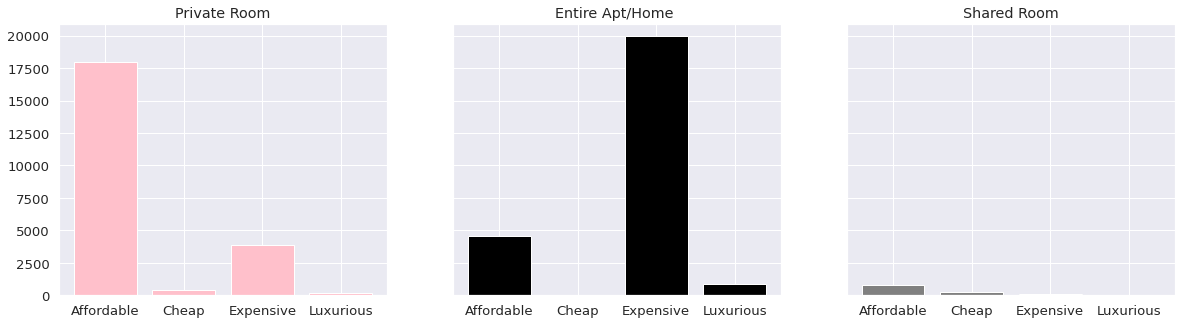

In [ ]:


xdata = ["Affordable","Cheap","Expensive","Luxurious"]
y_priv =[Afford_priv,cheap_priv,exp_priv,lux_priv]
y_ent=[Afford_ent,cheap_ent,exp_ent,lux_ent]
y_sh=[Afford_sh,cheap_sh,exp_sh,lux_sh]




fig, axs = plt.subplots(1, 3, figsize=(20,5), sharey=True)
axs[0].bar(xdata, y_priv,color ='pink',label='Private Room')
axs[1].bar(xdata, y_ent,color = 'black',label ='Entire Apt/Home')
axs[2].bar(xdata, y_sh,color='grey',label= 'Shared Room')

axs[0].set_title('Private Room')
axs[1].set_title('Entire Apt/Home ')
axs[2].set_title('Shared Room')


print('Price Category Vs Room type')

### Room Types In each neighbourhood with respect to Prices

Calculating the number of Airbnbs in each neighbourhood with regard to room type based on their price categories.

The results are tabulated below.

In [ ]:
man_priv=0
man_e=0
man_S=0

br_priv=0
br_e=0
br_S=0

q_priv=0
q_e=0
q_S=0

si_priv=0
si_e=0
si_S=0

bx_priv=0
bx_e=0
bx_S=0

for i in range(df.shape[0]):
  if (df.iloc[i,4] == "Brooklyn"):
    if(df.iloc[i,8] =="Private room"):
      br_priv+=1
    elif(df.iloc[i,8] =="Entire home/apt"):
      br_e+=1
    elif(df.iloc[i,8]=="Shared room"):
      br_S+=1


  elif (df.iloc[i,4] == "Manhattan"):
    if(df.iloc[i,8] =="Private room"):
      man_priv+=1
    elif(df.iloc[i,8] =="Entire home/apt"):
      man_e+=1
    elif(df.iloc[i,8]=="Shared room"):
      man_S+=1
  
  elif (df.iloc[i,4] == "Queens"):
    if(df.iloc[i,8] =="Private room"):
      q_priv+=1
    elif(df.iloc[i,8] =="Entire home/apt"):
      q_e+=1
    elif(df.iloc[i,8]=="Shared room"):
      q_S+=1


  elif (df.iloc[i,4] == "Staten Island"):
    if(df.iloc[i,8] =="Private room"):
      si_priv+=1
    elif(df.iloc[i,8] =="Entire home/apt"):
      si_e+=1
    elif(df.iloc[i,8]=="Shared room"):
      si_S+=1

  elif (df.iloc[i,4] == "Bronx"):
    if(df.iloc[i,8] =="Private room"):
      bx_priv+=1
    elif(df.iloc[i,8] =="Entire home/apt"):
      bx_e+=1
    elif(df.iloc[i,8]=="Shared room"):
      bx_S+=1
  

print("Types of room in Brooklyn")
print(br_priv)
print(br_e)
print(br_S)
print("--------")
print("Types of room in Manhattan")
print(man_priv)
print(man_e)
print(man_S)
print("--------")
print("Types of room in Queens ")
print(q_priv)
print(q_e)
print(q_S)
print("--------")
print("Types of room in Staten Island")
print(si_priv)
print(si_e)
print(si_S)
print("--------")
print("Types of room in Bronx")
print(bx_priv)
print(bx_e)
print(bx_S)

Types of room in Brooklyn
10132
9559
413
--------
Types of room in Manhattan
7982
13199
480
--------
Types of room in Queens 
3372
2096
198
--------
Types of room in Staten Island
188
176
9
--------
Types of room in Bronx
652
379
60


In [ ]:
l_mn=[man_priv,man_e,man_S]
l_br=[br_priv,br_e,br_S]
l_qn=[q_priv,q_e,q_S]
l_si=[si_priv,si_e,si_S]
l_bx=[bx_priv,bx_e,bx_S]


####Bar Charts

The bar charts below are a representation of the data extracted above.

<BarContainer object of 3 artists>

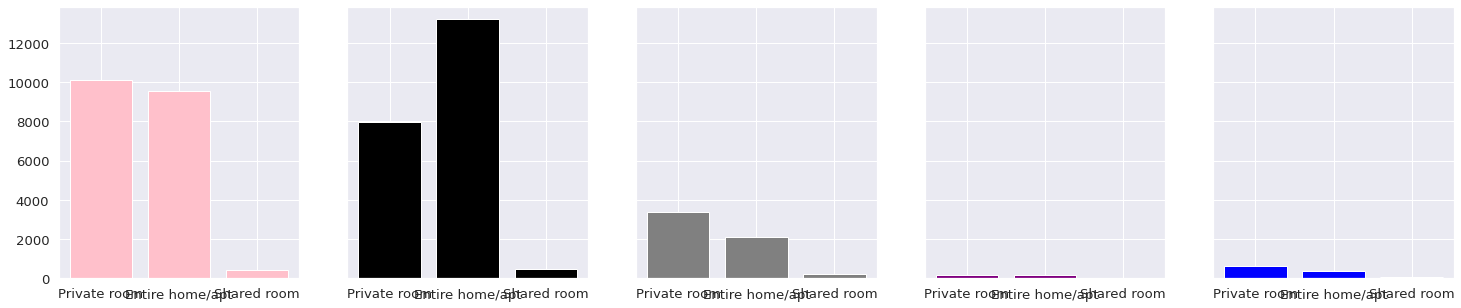

In [ ]:
x_data= ['Private room', 'Entire home/apt', 'Shared room']
fig, axs = plt.subplots(1, 5, figsize=(25,5), sharey=True)
axs[0].bar(x_data, l_br,color ='pink')
axs[1].bar(x_data, l_mn,color = 'black')
axs[2].bar(x_data, l_qn,color='grey')
axs[3].bar(x_data, l_si,color = 'purple')
axs[4].bar(x_data, l_bx,color='blue')


## Supplementary data set
---

Investigating the Relation between Accessibility to Landmarks and the effect it has on the Prices & Number of Listings in a specific neighbourhood.

###Opening Supplementary data set - NEW YORK LANDMARKS
---

In [ ]:
fname = "LPC_Ind_Landmarks.csv"
land = pd.read_csv(join(path_prefix, fname))



###Displaying the first 5 entries
---

In [ ]:
land.head()

,OBJECTID,the_geom,Borough,Block,Lot,Address,BBL,LPC_NAME,LPC_LPNumb,LPC_SiteDe,LPC_Altern,DesDate,LandmarkTy,URL_REPORT
0,1,MULTIPOLYGON (((-74.09145318437727 40.64302777...,SI,58,27,105 Franklin Avenue,5000580027,105 Franklin Avenue House,LP-00330,"Borough of Richmond Tax Map Block 58, Lot 27.",also known as Hamilton Park Cottage,10/13/1970 12:00:00 AM +0000,Individual Landmark,http://s-media.nyc.gov/agencies/lpc/lp/0330.pdf
1,2,MULTIPOLYGON (((-74.15192193203103 40.58295935...,SI,2390,194,435 Richmond Hill Road,5023900194,Decker Farmhouse,LP-00369,"Borough of Richmond Tax Map Block 2390, Lot 194.",NaN,12/13/1967 12:00:00 AM +0000,Individual Landmark,http://s-media.nyc.gov/agencies/lpc/lp/0369.pdf
2,3,MULTIPOLYGON (((-74.07790665812387 40.63378980...,SI,506,81,98 Grant Street,5005060081,Public School 15 (Daniel D. Tompkins School),LP-01877,"Borough of Staten Island Tax Map Block 506, Lo...",NaN,11/19/1996 12:00:00 AM +0000,Individual Landmark,http://s-media.nyc.gov/agencies/lpc/lp/1877.pdf
3,4,MULTIPOLYGON (((-74.13066516743713 40.63716901...,SI,1015,9,121 Heberton Avenue,5010150009,121 Heberton Avenue House,LP-02120,Borough of the Staten Island Tax Map Block 101...,NaN,12/17/2002 12:00:00 AM +0000,Individual Landmark,http://s-media.nyc.gov/agencies/lpc/lp/2120.pdf
4,5,MULTIPOLYGON (((-74.13863423148467 40.57340207...,SI,2281,155,3531 Richmond Road,5022810155,Reverend David Moore House,LP-00366,"Borough of Richmond Tax Map Block 2282, Lot 155.",also known as the Moore-McMillen House,08/24/1967 12:00:00 AM +0000,Individual Landmark,http://s-media.nyc.gov/agencies/lpc/lp/0366.pdf


###Number of Landmarks/Rows
---

The following piece of code returns the total number of landmarks present in the data set along with their details.


In [ ]:
land.shape[0]


1492

###Description of Data
---

The output represents the break down of data avaiable for each Landmark.


In [ ]:
land.dtypes


OBJECTID       int64
the_geom      object
Borough       object
Block          int64
Lot            int64
Address       object
BBL            int64
LPC_NAME      object
LPC_LPNumb    object
LPC_SiteDe    object
LPC_Altern    object
DesDate       object
LandmarkTy    object
URL_REPORT    object
dtype: object

###Calculating the number of Landmarks per Neighbourhood
---

The following section classifies the landmarks based on their neighbourhood groups.
It includes:

1) a list containing the name of landmarks for each neighbourhood group

2) a list containing the total number of landmarks in each neighbourhood group

The results of this code are tabulated below.


In [ ]:
BK_pl=[]
MN_pl=[]
QN_pl=[]
SI_pl=[]
BX_pl=[]


for i in range(land.shape[0]):
  if (land.iloc[i,2] == "BK"):
      name= land.iloc[i,6]
      BK_pl.append(name)
  elif(land.iloc[i,2] == "MN"):
      name = land.iloc[i,6]
      MN_pl.append(name)
  elif (land.iloc[i,2] == "QN"):
      name= land.iloc[i,6]
      QN_pl.append(name)
  elif (land.iloc[i,2] == "SI"):
      name = land.iloc[i,6]
      SI_pl.append(name)
  elif (land.iloc[i,2] == "BX"):
      name = land.iloc[i,6]
      BX_pl.append(name)

def total(listings):
  return len(listings)

Num_p =[]
BK_L=total(BK_pl)
MN_L=total(MN_pl)
QN_L=total(QN_pl)
SI_L=total(SI_pl)
BX_L=total(BX_pl)



Num_p.append(BK_L)
Num_p.append(MN_L)
Num_p.append(QN_L)
Num_p.append(SI_L)
Num_p.append(BX_L)

Num_p




  

[206, 959, 84, 138, 97]

|NEIGHBOURHOODS     | Nummber of Landmarks    |
|--- | --- |
|Brooklyn   | 206    |
|Manhattan  | 959     |
|Queens     | 84      |
|Staten Island  | 138     |
|Bronx    | 97    |

##Visualisation & Analyzing  the extracted Data
---

The data collected above is used to plot:

1) A pie chat 

2) A bar graph

#### 1 Pie and Bar chart
---

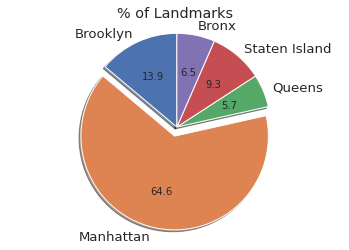

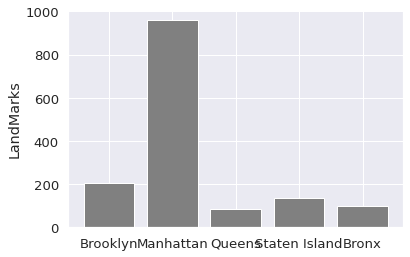

In [ ]:

labels = 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'

explode = (0, 0.1, 0, 0,0)  # only "explode" the 2nd slice

plt.pie(Num_p, explode=explode, labels=labels, autopct='%.1f',
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("% of Landmarks")
plt.show()

ydata = Num_p
xdata =["Brooklyn", "Manhattan", "Queens", "Staten Island", "Bronx"]
plt.bar(xdata,ydata, color='grey') 

plt.ylabel("LandMarks") 
plt.show()



From these above displayed statistics it is evident that Manhattan has the largest share of the total number of landmarks (64.6%).


#### Line graphs
---

The following figure show the relation between Neighbourhood group and Average Prices.

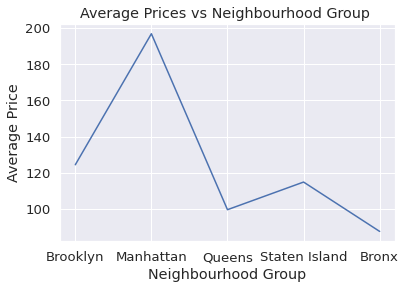

In [ ]:
plt.plot(Hoods,ALL_avg)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.title('Average Prices vs Neighbourhood Group ')


plt.show()

From these above displayed statistics it is evident that Manhattan has the Highest Average Prices

The following figure show the relation between Number of Landmarks and Average Prices in each neighbourhood group.

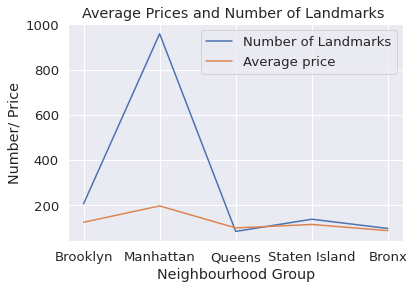

In [ ]:
x1 = Hoods
y1 = Num_p
plt.plot(x1, y1, label = "Number of Landmarks")
x2 = Hoods
y2 = ALL_avg
plt.plot(x2, y2, label = "Average price")
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number/ Price')
plt.title('Average Prices and Number of Landmarks ')

plt.legend()


plt.show()

Through this we can deduce that as that since Manhattan has the highest number of Landmarks, the Average price is Highest as well.
This trend can be noticed in each neighbourhood group. To prove this finding we will further investigate using hypothesis testing.

The following figure show the relation between Number of Landmarks and Number of Listings in each neighbourhood group.

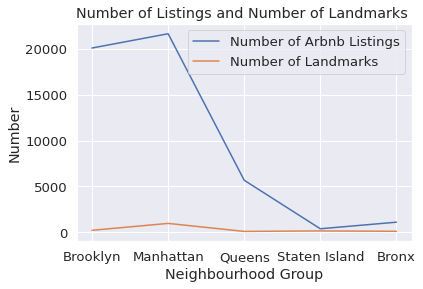

In [ ]:
x4 = Hoods
y5 = Num_listings_each
plt.plot(x4, y5, label = "Number of Arbnb Listings")
x7 = Hoods
y8 = Num_p
plt.plot(x7, y8, label = "Number of Landmarks")
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number')
plt.title('Number of Listings and Number of Landmarks ')

plt.legend()

plt.show()

Through this we can deduce that as that since Manhattan has the highest number of Landmarks, the Number of Listings is Highest as well. Even though there is not a huge difference in the Number of Listings of Brooklyn and Manhattan, as seen from the graph above there is a significant difference in the average prices.
 To prove this finding we will further investigate using hypothesis testing.

|NEIGHBOURHOODS     | Number of Landmarks    | Average Price | Number of Listings
|--- | --- | ---|----|
|Brooklyn   | 206    | 124.34 |20104
|Manhattan  | 959     |196.88|21661
|Queens     | 84      |99.52|5666
|Staten Island  | 138     |114.81|373
|Bronx    | 97    |87.50| 1091


###Hypothesis Testing

####Adding Column for Landmarks in Borough

Adding the number of accesible Landmarks for each AIRBNB based on neighbourhood group. And creating a column `Land Marks In Borough`




In [ ]:
Land_Mark=[]

for i in range(df.shape[0]):
  if (df.iloc[i,4] == "Brooklyn"):
    br_landm=BK_L
    Land_Mark.append(br_landm)
  elif (df.iloc[i,4] == "Manhattan"):
    mn_landm=MN_L
    Land_Mark.append(mn_landm)
  elif (df.iloc[i,4] == "Queens"):
    qn_landm=QN_L
    Land_Mark.append(qn_landm)
  elif (df.iloc[i,4] == "Staten Island"):
     si_landm=SI_L
     Land_Mark.append(si_landm)
  elif (df.iloc[i,4] == "Bronx"):
     bx_landm=BX_L
     Land_Mark.append(bx_landm)
    
df["Land Marks In Borough"]= Land_Mark
df.head(4)



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Price Category,Review Category,Land Marks In Borough
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Expensive,Average,206
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Expensive,Good,959
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,Expensive,Low Rated,959
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Affordable,Excellent,206


###Adding Column for Accessibilty to LandMarks

Categorising Accesibility to Landmarks from each Airbnb as follows:

1)Low

2)Moderate

3)High

4)Best

and creating a column `Accessibilty to LandMarks`

In [ ]:
def access_categories(num):
  if ((50<=num) and ( num<= 100)):
    A="Low"
    return A
  elif ((101<= num)) and ((num <=200)):
    e="Moderate"
    return e
  elif ((201<= num)) and ((num <=500)):
    e="High"
    return e
  elif (num>=501):
    l ="Best"
    return l

access_cat = []
for k in range( df.shape[0]):
  catt= access_categories(df.iloc[k,18])
  access_cat.append(catt)
df["Accessibilty to LandMarks"]= access_cat 
df.head(4)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Price Category,Review Category,Land Marks In Borough,Accessibilty to LandMarks
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Expensive,Average,206,High
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Expensive,Good,959,Best
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,Expensive,Low Rated,959,Best
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Affordable,Excellent,206,High


Contingency Table of `Accessibilty to LandMarks` and `Price Category`

In [ ]:
Accessiblity_vs_Price= pd.crosstab(df["Accessibilty to LandMarks"], df["Price Category "])

Accessiblity_vs_Price

Price Category,Affordable,Cheap,Expensive,Luxurious
Accessibilty to LandMarks,,,,
Best,6846,75,13967,773
High,11428,343,8104,229
Low,4741,225,1755,36
Moderate,254,16,97,6


####Bar Chart

Bar chart showing the Accesibilty vs Prices

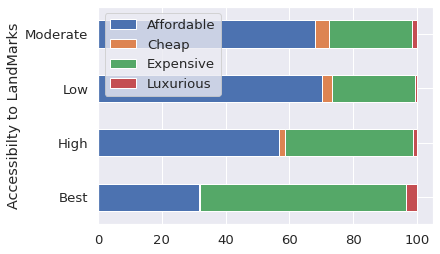

In [ ]:

normalize =Accessiblity_vs_Price.div(Accessiblity_vs_Price.sum(axis=1),axis=0)
normalize= normalize*100

normalize.plot.barh(stacked=True,legend=True)
plt.legend()
plt.show()

The above contingency table and bar chart depicts an interesting trend in our data.The airbnbs with the best accessibilty to landmarks are the mostly either expensive or in the luxurious price ranges.And the ones with moderate or low accessibility are mostly affordable.

Hence, we will now further investigate and try to find deduce the mathematical relation that might exist:

###Null Hypothesis

In the following test, our hypotheses setting is the following:

$H_0$: `Accessibilty to LandMarks` and `Price Category ` are independent variables.

$H_A$: `Accessibilty to LandMarks` and `Price Category ` are **not** independent variables.

Using Chi-Test from scipy on the Contingency Table (`Accessiblity`_vs_`Price`)
to evaluate the p-value.

In [ ]:
from scipy import stats
stats.chi2_contingency(Accessiblity_vs_Price)

(5209.8781995523605,
 0.0,
 9,
 array([[1.03084121e+04, 2.91943941e+02, 1.05981410e+04, 4.62502996e+02],
        [9.56743994e+03, 2.70958912e+02, 9.83634302e+03, 4.29258125e+02],
        [3.21563827e+03, 9.10699049e+01, 3.30601720e+03, 1.44274629e+02],
        [1.77509704e+02, 5.02724205e+00, 1.82498804e+02, 7.96424992e+00]]))

| X^2     | P-Value   | Degree of Freedom
|---| ---| ---|
|5209.8781995523605 | 0.0 | 9

In [ ]:
from scipy.special import chdtrc
pval = chdtrc(9,5209.8781995523605)

print("p value is :",pval)
if pval < 0.05 :
  print("Rejecting null hypothesis")

else:
  print("Accepting null hypothesis")

p value is : 0.0
Rejecting null hypothesis


Since the p-value is less than significance Level(0.05), we reject the null hypothesis that `Accessibilty to LandMarks and Price Category are independent variables` and conclude that a significant `relation exists`. 

###Landmarks Vs Average Prices

Since we concluded that there is a relation between the Number of Landmarks and prices, and are dependant.

We will now use Average Prices and the Total Number of Landmarks in each borough to further strengthen the conclusion above and deduce the correlation.

####Null Hypothesis

In the following test, our hypotheses setting is the following:

$H_0$: `Number Of Landmarks` and `Average Prices` are independent variables.

$H_A$: `Number Of Landmarks` and `Average Prices` are **not** independent variables.

Average Prices Vs Number of Landmarks


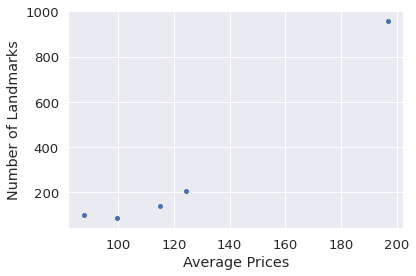

In [ ]:
sns.set_style("darkgrid")
plt.xlabel("Average Prices")
plt.ylabel("Number of Landmarks")
sns.scatterplot(x= ALL_avg, y= Num_p, data=df )
print("Average Prices Vs Number of Landmarks")

Relation between Number of Landmarks and Price


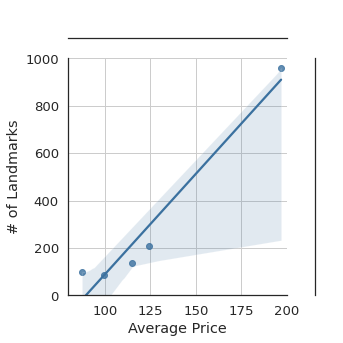

In [ ]:
from scipy.stats import pearsonr
sns.set(style='white', font_scale=1.2)
print("Relation between Number of Landmarks and Price")

g = sns.JointGrid(data=df, x=ALL_avg, y=Num_p, xlim=(80, 200), ylim=(0, 1000), height=5)
g = g.plot_joint(sns.regplot, color="xkcd:muted blue")
plt.grid()
plt.xlabel("Average Price")
plt.ylabel("# of Landmarks")
plt.tight_layout()



From the above extracted data we can use scipy.stats to calcualte the Correlation coefficient and the p-value of Number of Landmarks and Average Prices.

In [ ]:
import scipy.stats

r, p = scipy.stats.pearsonr(ALL_avg, Num_p)
print("Correlation Coefficient :", r)
print("P-Value :", p)

Correlation Coefficient : 0.9733728436134054
P-Value : 0.005194919252609982


Above we have used Pearson's r value formula. And the value of r (Correlation Coefficient : 0.9733728436134054) is closer to 1 which signifies that these two variables (Number of Landmarks and Average Prices) are strongly and postively correlated.

Moreover since the p-value is less than significance Level(0.05), we reject the null hypothesis that `Number of Landmarks and Average Prices are independent variables` and conclude that a significant `relation exists`.

###Number of Landmarks Vs Number of Listings)

Since we concluded that there is a relation between the Number of Landmarks and Number of Listings, in an above shown line graph.

We will now use 

1)Correlation Coefficient

2)P-Value

to further strengthen the conclusion above and deduce the correlation.

In the following test, our hypotheses setting is the following:

$H_0$: `Number Of Landmarks` and `Number of Listings` are **not** independent variables.

$H_A$: `Number Of Landmarks` and `Number of Listings` are independent variables.

Relation between Number of Landmarks and Number of Listings


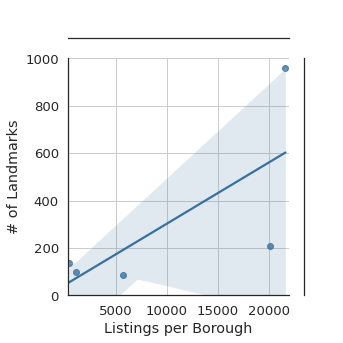

In [ ]:
from scipy.stats import pearsonr
sns.set(style='white', font_scale=1.2)
print("Relation between Number of Landmarks and Number of Listings")

g = sns.JointGrid(data=df, x=Num_listings_each, y=Num_p, xlim=(300, 22000 ), ylim=(0, 1000), height=5)
g = g.plot_joint(sns.regplot, color="xkcd:muted blue" )
plt.grid()
plt.xlabel("Listings per Borough")
plt.ylabel("# of Landmarks")
plt.tight_layout()

In [ ]:
r1, p1 = scipy.stats.pearsonr(Num_listings_each, Num_p)
print("Correlation Coefficient :", r1)
print("P-Value :", p1)

Correlation Coefficient : 0.7140717017407588
P-Value : 0.17545056900978978


Above we have used Pearson's r value formula. And the value of r (Correlation Coefficient : 0.7140717017407588) is closer to 1 which signifies that these two variables (Number of Landmarks and Number of Listings) are strongly and postively correlated.

Moreover since the p-value is higher than significance Level(0.05), we accept the null hypothesis that `Number of Landmarks and Number of Listings are not independent variables` and conclude that a significant `relation exists`.

##Machine Learning


We shall now use Machine Learing to detect patterns in our enhanced NYC dataset, and our goal is to use the data to develop models that we can use to predict future data like price ranges/categories.




### Decision Tree

Decision Tree is a popular classifier machine learning model which comes under the category of **"Eager Learners"**, because it first builds a classification model on the training dataset before being able to actually classify an unseen observation from test dataset.

We are applying this model to our data set in which our target column is `Price Category Number` as created below.


Before we proceed,we need to convert  relevant categories to integers from string. Hence, we use **encoding** for this conversion.





In [ ]:
df["Price Category Number"] = df["Price Category "].map({'Cheap': 0, 'Affordable': 1, 'Expensive':2, 'Luxurious': 3 })
df["Accessibilty to LandMarks Numbers"] = df["Accessibilty to LandMarks"].map({'Low': 0, 'Moderate': 1, 'High':2, 'Best': 3 })

In [ ]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Price Category,Review Category,Land Marks In Borough,Accessibilty to LandMarks,Price Category Number,Accessibilty to LandMarks Numbers
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Expensive,Average,206,High,2,2
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Expensive,Good,959,Best,2,3
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,Expensive,Low Rated,959,Best,2,3
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Affordable,Excellent,206,High,1,2
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Affordable,Average,959,Best,1,3


We made a copy of the actual data set and removed the columns which contain strings.

In [ ]:
df_c=df.copy()
df_c = df_c.drop("name", axis=1)
df_c = df_c.drop("host_name", axis=1)
df_c = df_c.drop("neighbourhood_group", axis=1)
df_c = df_c.drop("neighbourhood", axis=1)
df_c = df_c.drop("room_type", axis=1)
df_c = df_c.drop("last_review", axis=1)
df_c = df_c.drop("Price Category ", axis=1)
df_c = df_c.drop("Review Category ", axis=1)
df_c = df_c.drop("Accessibilty to LandMarks", axis=1)
df_c = df_c.drop("reviews_per_month", axis=1)


 

df_c.head(5)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,Land Marks In Borough,Price Category Number,Accessibilty to LandMarks Numbers
0,2539,2787,40.64749,-73.97237,149,1,9,6,365,206,2,2
1,2595,2845,40.75362,-73.98377,225,1,45,2,355,959,2,3
2,3647,4632,40.80902,-73.94190,150,3,0,1,365,959,2,3
3,3831,4869,40.68514,-73.95976,89,1,270,1,194,206,1,2
4,5022,7192,40.79851,-73.94399,80,10,9,1,0,959,1,3


Here, we specify the feature and target columns:

In [ ]:
x = df_c.drop("Price Category Number", axis = 1)
y= df_c["Price Category Number"]   

We decide on the **evalution metrics and split** the data into 80% train and 20% test because it is a commmon practice to divide data in these ratios.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.20)

In [ ]:
print(x_train.shape, x_test.shape)


(39116, 11) (9779, 11)


Here, for **model A** , we apply the decision tree model to our data with   **hyperparameters** set to default:

In [ ]:
from sklearn import tree

model_dt_Pc = tree.DecisionTreeClassifier() #Create decision tree classifier object
model_dt_Pc.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Determing the **accuracy score** on model A:

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

X_train = pd.DataFrame(x_train)
X_test = pd.DataFrame(x_test) 
y_train = pd.DataFrame(y_train) 
y_test = pd.DataFrame(y_test)


train_pred_1 = model_dt_Pc.predict(X_train)
train_acc_1 = accuracy_score(y_train, train_pred_1)
print("Accuracy of train Model A: " ,train_acc_1)

test_pred_1 = model_dt_Pc.predict(X_test)
test_acc_1 = accuracy_score(y_test, test_pred_1)
print("Accuracy of test Model A: ",test_acc_1)




Accuracy of train Model A:  1.0
Accuracy of test Model A:  1.0


The accuracy score indicates maximum accuracy for both train and test data in model A.This is **improbable and unrealistic** and depicts an **error** while determining our features and/or target columns.

We **detected** that in model A while selecting features, we had included the `price` column and this gave the model extra information to predict the future outcomes easily.In the following codes, we drop the `price` column and construct another machine learning model:

In [ ]:
df_c = df_c.drop("price", axis=1)
df_c.head(5)

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,Land Marks In Borough,Price Category Number,Accessibilty to LandMarks Numbers
0,2539,2787,40.64749,-73.97237,1,9,6,365,206,2,2
1,2595,2845,40.75362,-73.98377,1,45,2,355,959,2,3
2,3647,4632,40.80902,-73.94190,3,0,1,365,959,2,3
3,3831,4869,40.68514,-73.95976,1,270,1,194,206,1,2
4,5022,7192,40.79851,-73.94399,10,9,1,0,959,1,3


In [ ]:
x = df_c.drop("Price Category Number", axis = 1)
y= df_c["Price Category Number"] 

**Model B** with **hyperparameters set to default and the same split** as model A:

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.20)

In [ ]:
print(x_train.shape, x_test.shape)

(39116, 10) (9779, 10)


In [ ]:
from sklearn import tree

model_dt_Pc = tree.DecisionTreeClassifier() #Create decision tree classifier object
model_dt_Pc.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

X_train = pd.DataFrame(x_train)
X_test = pd.DataFrame(x_test) 
y_train = pd.DataFrame(y_train) 
y_test = pd.DataFrame(y_test)


train_pred_1 = model_dt_Pc.predict(X_train)
train_acc_1 = accuracy_score(y_train, train_pred_1)
print("Accuracy of train Model B: " ,train_acc_1)

test_pred_1 = model_dt_Pc.predict(X_test)
test_acc_1 = accuracy_score(y_test, test_pred_1)
print("Accuracy of test Model B: ",test_acc_1)



Accuracy of train Model B:  1.0
Accuracy of test Model B:  0.633704877799366


Accuracy of train model B is 1.0 while there is a drop in the accuracy value the test data , showing an **improvement** on our previous model A.

However, the difference between the accuracy scores of train and test data is significant which indicates **over-fitting**  and we need to adjust the hyperparameteres.

| | Model A | Model B |
|---|---|---|
|Train| 1.0| 1.0 |
|Test| 1.0| 0.63|

For determining the most accurate possible hyperparameter values for  **min_sample_leaf**  and **max-depth** we test the values for a **range of 10** values for each parameter.

The **i** values represent  **min_sample_leaf** value
The **j** values represent  **min_sample_leaf** value

Further more the **difference the test and train accuracy values** obtained for each pair of i and j are printed below.The difference values are later used to to selected the best candidate pair for hyperparameters **to avoid over-fitting **to as best as possible.

The following code represents hyperparameter tuning by trial and error:




In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
i = 1
j = 1
maxim = 0
maxim1 = 0
bleaf= 0
bdepth = 0
difference = 100
for i in range(10):
  i = i +1
  for j in range(10):
    j = j +1
    model_dt_Pc_trial = tree.DecisionTreeClassifier(min_samples_leaf = i, max_depth = j) #Create decision tree classifier object
    model_dt_Pc_trial.fit(x_train, y_train)
    

    X_traintrial = pd.DataFrame(x_train)
    X_testtrial = pd.DataFrame(x_test) 
    y_traintrial = pd.DataFrame(y_train) 
    y_testtrial = pd.DataFrame(y_test)


    train_pred_1_btrial = model_dt_Pc_trial.predict(X_traintrial)
    train_acc_1_btrial = accuracy_score(y_traintrial, train_pred_1_btrial)
    print("Accuracy of train i = ", i, " j = ", j , "=" ,train_acc_1_btrial)

    test_pred_1_btrial = model_dt_Pc_trial.predict(X_testtrial)
    test_acc_1_btrial = accuracy_score(y_testtrial, test_pred_1_btrial)
    print("Accuracy of test Model C: ",test_acc_1_btrial)

    diff = train_acc_1_btrial - test_acc_1_btrial
    print("Diff =  ",diff)
    print("--------------------------------")
    if train_acc_1_btrial > maxim:
      maxim = train_acc_1_btrial
    if test_acc_1_btrial > maxim1:
      maxim1 = test_acc_1_btrial
    if diff < difference:
      difference = diff
      bleaf = i
      bdepth = j

print("The highest train = ", maxim) 
print("The highest test = ", maxim1) 
print("The least diff, leaf =", bleaf, " depth =", bdepth)

Accuracy of train i =  1  j =  1 = 0.6454903364352184
Accuracy of test Model C:  0.6429082728295327
Diff =   0.0025820636056856916
--------------------------------
Accuracy of train i =  1  j =  2 = 0.6596277738010021
Accuracy of test Model C:  0.6573269250434605
Diff =   0.0023008487575416625
--------------------------------
Accuracy of train i =  1  j =  3 = 0.6698026383065753
Accuracy of test Model C:  0.6721546170365068
Diff =   -0.0023519787299315364
--------------------------------
Accuracy of train i =  1  j =  4 = 0.6861386644851212
Accuracy of test Model C:  0.6816647919010124
Diff =   0.004473872584108807
--------------------------------
Accuracy of train i =  1  j =  5 = 0.6885162082012476
Accuracy of test Model C:  0.6823806115144698
Diff =   0.006135596686777767
--------------------------------
Accuracy of train i =  1  j =  6 = 0.6942938950812967
Accuracy of test Model C:  0.6860619695265364
Diff =   0.008231925554760267
--------------------------------
Accuracy of train 

After comparing all of these values and their differences, we choose the following values:

**min_sample_leaf value is 5**

**min_sample_leaf value is 7**

The reason for picking these values is that by these hyperparameter settings we obtain a **considerably high test accuracy value and the minimum difference** both, the same values can also be achieved by the values i= 1 and j=3.

In [ ]:
model_dt_Pc_better = tree.DecisionTreeClassifier(min_samples_leaf = 5, max_depth = 7) #Create decision tree classifier object
model_dt_Pc_better.fit(x_train, y_train)
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

X_train = pd.DataFrame(x_train)
X_test = pd.DataFrame(x_test) 
y_train = pd.DataFrame(y_train) 
y_test = pd.DataFrame(y_test)


train_pred_1_b = model_dt_Pc_better.predict(X_train)
train_acc_1_b = accuracy_score(y_train, train_pred_1_b)
print("Accuracy of train Model C: " ,train_acc_1_b)

test_pred_1_b = model_dt_Pc_better.predict(X_test)
test_acc_1_b = accuracy_score(y_test, test_pred_1_b)
print("Accuracy of test Model C: ",test_acc_1_b)


Accuracy of train Model C:  0.7017333060640147
Accuracy of test Model C:  0.6912772267102976


|min_sample_leaf | max_depth| Acc of Train | Acc of Test|
|---|---|---|---|
|<font color = 'red'>5</font>|<font color = 'red'>7</font>|<font color = 'red'>0.7017</font>|<font color = 'red'>0.6913</font>| 


The graph below indicates the improvement of model B to model C with the most suitable hyperparameters:

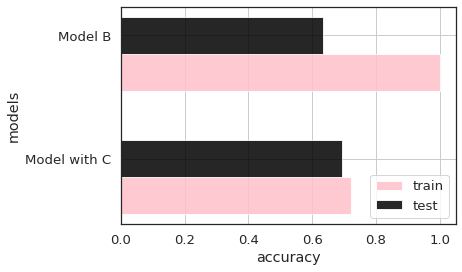

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
train = (train_acc_1_b,train_acc_1)
test = (test_acc_1_b,test_acc_1)

n_groups = 2


fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.85

r = plt.barh(index,train, bar_width,
alpha=opacity,
color='pink',
label='train')

r2 = plt.barh(index + bar_width, test, bar_width,
alpha=opacity,
color='black',
label='test')
plt.grid()

plt.xlabel('accuracy')
plt.ylabel('models')

plt.yticks(index + bar_width, ('Model with C','Model B' ))
plt.legend()

plt.show()

| | Model B | Model C |
|---|---|---|
|Train| 1.0| 0.7017 |
|Test| 0.63| 0.6913|

The difference between train and test values of model C have decreased and this corrects over-fitting.

**Cross-validation** is an important technique in machine learning. It provides a better assessment of the model quality on new data compared to the hold-out set approach. However, cross-validation is computationally expensive when you have a lot of data.

Hence, we are appplying cross-validation on our model B and model C to further explore the difference and performance between the two.

In [ ]:
model_Check= tree.DecisionTreeClassifier()
model_Check2 = tree.DecisionTreeClassifier(min_samples_leaf = 5, max_depth = 7)

acc_c = cross_val_score(model_Check,x,y, cv = 20)
print("Cross Validation Score of Model B: %0.2f (+/- %0.2f)" % (acc_c.mean(), acc_c.std() * 2))

acc2c = cross_val_score(model_Check2,x,y, cv = 20)
print("Cross Validation Score of Model C: %0.2f (+/- %0.2f)" % (acc2c.mean(), acc2c.std() * 2))

Cross Validation Score of Model B: 0.52 (+/- 0.13)
Cross Validation Score of Model C: 0.67 (+/- 0.10)


###K-Nearest Neighbour

Another simple, yet a powerful machine learning algorithm is **kNN**. It's a supervised algorithm and can be used in both classification and regression. 

We have used KNN-based classifier because we categorzied the `price` column and the data obtained is represented by `Price Category Number` which has discrete data.
The **KNN-based classifier** does not build any classification model but directly learns from the training instances. It starts processing data only after it is given a test observation to classify. Thus, KNN comes under the category of **"Lazy Learner"** approaches.





Hyperparameter tuning is done in the following code to decide which k value gives the optimal result for each of the three KNN models used.

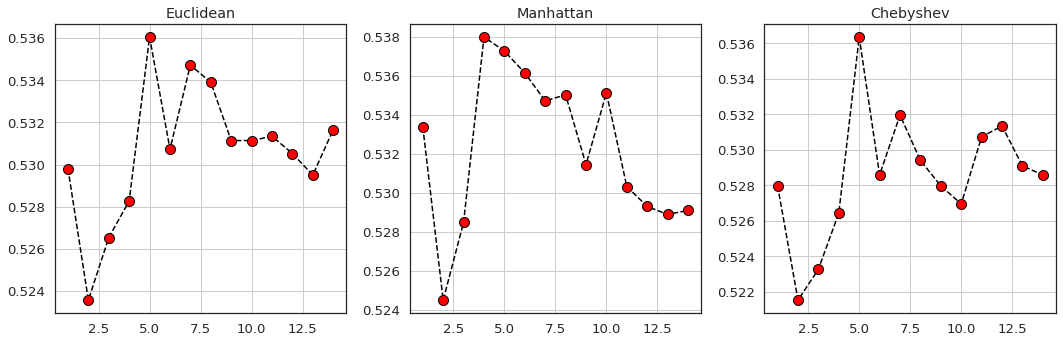

In [ ]:


from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
xknn = df_c.drop("Price Category Number", axis = 1)
yknn = df_c["Price Category Number"]   #the thing we need to predict
from sklearn.model_selection import train_test_split

# 80% for training and 20% for testing-validation
xk_train, xk_test, yk_train, yk_test = train_test_split(xknn, yknn, test_size=0.20, random_state=0)
from sklearn.metrics import accuracy_score

K_range = np.arange(1, 15)
accuracy_list = []

for k in K_range:
  # create a new model with current K
  knn1 = KNeighborsClassifier(k, metric="euclidean")
  # fit training data
  knn1.fit(xk_train, yk_train)
  # predict the validation data
  y_pred = knn1.predict(xk_test)
  # obtain the accuracy value
  accuracy = accuracy_score(yk_test, y_pred)
  accuracy_list.append(accuracy)

K_range2 = np.arange(1, 15)
accuracy_list2 = []

for k2 in K_range2:
  # create a new model with current K
  knn2= KNeighborsClassifier(k2, metric="manhattan")
  # fit training data
  knn2.fit(xk_train, yk_train)
  # predict the validation data
  y_pred = knn2.predict(xk_test)
  # obtain the accuracy value
  accuracy2 = accuracy_score(yk_test, y_pred)
  accuracy_list2.append(accuracy2)

K_range3 = np.arange(1, 15)
accuracy_list3 = []

for k3 in K_range3:
  # create a new model with current K
  knn3= KNeighborsClassifier(k3, metric="chebyshev")
  # fit training data
  knn3.fit(xk_train, yk_train)
  # predict the validation data
  y_pred = knn3.predict(xk_test)
  # obtain the accuracy value
  accuracy3 = accuracy_score(yk_test, y_pred)
  accuracy_list3.append(accuracy3)


fig, ax = plt.subplots(1,3, figsize=(15,5))

ax[0].plot(K_range, accuracy_list, color='black', linestyle='dashed', marker='o',  
         markerfacecolor='red', markersize=10, )
ax[1].plot(K_range, accuracy_list2, color='black', linestyle='dashed', marker='o',  
         markerfacecolor='red', markersize=10)
ax[2].plot(K_range, accuracy_list3, color='black', linestyle='dashed', marker='o',  
         markerfacecolor='red', markersize=10)
ax[0].grid()
ax[1].grid()
ax[2].grid()

ax[0].set_title("Euclidean")
ax[1].set_title("Manhattan")
ax[2].set_title("Chebyshev")

plt.tight_layout()
plt.show()





For each of the Euclidean and Chebyshev models, the highest accuracy value is achieved when the k-value is 5. While the second highest accuracy value of Manhattan model is achieved at 5. Hence we decided to use **k = 5**.

In [ ]:

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier 
# create a new model with current K
knn_1 = KNeighborsClassifier(5, metric="euclidean")
# fit training data
knn_1.fit(xk_train, yk_train)
# predict the validation data
yk_pred = knn_1.predict(xk_test)
# obtain the accuracy value
score_euc = f"{accuracy_score(yk_test, yk_pred):.3f}"


# create a new model with current K
knn_2 = KNeighborsClassifier(5, metric="manhattan")
# fit training data
knn_2.fit(xk_train, yk_train)
# predict the validation data
yk_pred = knn_2.predict(xk_test)
# obtain the accuracy value
score_man = f"{accuracy_score(yk_test, yk_pred):.3f}"

# create a new model with current K
knn_3 = KNeighborsClassifier(5, metric="chebyshev")
# fit training data
knn_3.fit(xk_train, yk_train)
# predict the validation data
yk_pred = knn_3.predict(xk_test)
# obtain the accuracy value
score_cheb = f"{accuracy_score(yk_test, yk_pred):.3f}"

print("Euclidean Accuracy : ", score_euc)

print("Manhattan Accuracy : ", score_man)

print("Chebyshev Accuracy : ", score_cheb)


Euclidean Accuracy :  0.536
Manhattan Accuracy :  0.537
Chebyshev Accuracy :  0.536


Now we perform Standardization of our data to obtain more accurate results.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_c)
fitt = scaler.transform(df_c)

fit_col = df_c["Price Category Number"]
fitt = np.delete(fitt, 9, axis=1)

X_train, X_test, y_train, y_test = train_test_split(fitt, yknn, test_size=0.20, random_state=0)

# create model for Euclidean
knn = KNeighborsClassifier(5, metric="euclidean")
# fit training data
knn.fit(X_train, y_train)
# predict the validation data
y_pred = knn.predict(X_test)
# obtain the accuracy value
acc_euc_std = f"{accuracy_score(y_test, y_pred):.3f}"

# create model for Manhattan
knn = KNeighborsClassifier(5, metric="cityblock")
# fit training data
knn.fit(X_train, y_train)
# predict the validation data
y_pred = knn.predict(X_test)
# obtain the accuracy value
acc_man_std = f"{accuracy_score(y_test, y_pred):.3f}"

# create model for Chebyshev
knn = KNeighborsClassifier(5, metric="chebyshev")
# fit training data
knn.fit(X_train, y_train)
# predict the validation data
y_pred = knn.predict(X_test)
# obtain the accuracy value
acc_cheb_std = f"{accuracy_score(y_test, y_pred):.3f}"

print("The Euclidean Accuracy = ", acc_euc_std)

print("The Manhattan Accuracy = ", acc_man_std)

print("The Chebyshev Accuracy = ", acc_cheb_std)

The Euclidean Accuracy =  0.662
The Manhattan Accuracy =  0.672
The Chebyshev Accuracy =  0.653


<table>
  <thead>
    <tr>
      <th>Distance Function</th>
      <th>Raw Features</th>
      <th>Standardized Features</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Chebyshev</td>
      <td>0.536</td>
      <td>0.653</td>
    </tr>
    <tr>
      <td>Euclidean</td>
      <td>0.536</td>
      <td>0.662</td>
    </tr>
    <tr>
      <td>Manhattan</td>
      <td>0.537</td>
      <td>0.672</td>
    </tr>
  </tbody>
</table>

|  |MODEL A (DECSION TREE)|MODEL B (DECISION TREE)|MODEL C (DECISION TREE)|
|---|---|---|---|
|TRAIN|1|1|0.70|
|TEST |1|0.63|0.69|

##Analysis



As seen in the tables above, we implemented 3 distance functions (Euclidean, Chebyshev, Manhattan) in our kNN algorithm. After which we used standardization to achieve better values overall. The highest Accuracy scored we obtained was with k = 5 using the "Manhattan" distance function which us Accuracy value of 0.672.

But our Decision Tree Classifier Model C performed relatively better considering all the others. We used min_sample_leaf value = 5 and max_depth = 7, after which we obtained an accuracy value on train data to be 0.7017 and an accuracy value on test data is 0.6913.
Moreover after using cross-validation on model C we obtained the value
was 0.67 (+/- 0.10). 

The cross-validation score of model C and the accuracy score of the function Manhattan from the KNN models have approxametly the same the same results.










##Comparison

Using either of the models have both pros and cons. But we would prefer using the Decision Tree model C for the reaons discussed as follows.

**ADVANTAGES OF A DECISION TREE MODEL OVER KNN :**

* Decision Trees have a high interpretability of the model because it can work with clear human-understandable classification rules.
* KNN performs on-the-spot learning, it requires frequent database lookups, hence, can be computationally expensive ,while Decision Tree Classifiers do not require such lookups as it has in-memory classification model ready.
* KNN is considered fast in comparison with compositions of algorithms, but the number of neighbors used for classification is usually large in real life applications , in which case the algorithm will not operate as fast as a decision tree.

**DISADVANTAGE OF DECISION TREES COMPARED TO  k-Nearest Neighbours :**

* A well-tuned K can model complex decision spaces having arbitrarily complicated decision boundaries because it is an instance based learner, which are not easily modeled by other "eager" learners like Decision Trees.
.




##Conclusion


According, to our evaluation Model C of the Decision Tree out performs all other models.
In our features we have included the `Accessibilty to Landmarks Numbers` column, among other data, which we compared to the `Price Category Numbers`, for Machine Learning Models. The ability of the two classification models to identify new data in terms of the above mentioned columns renders the  **solution applicable**.

However, some of the limitations in model C might be the hyperparameter tuning.The process for hyperparameter tuning as demonstarted above was time-consuming and might not yield the best possible accuracies results.

Finally as we have obtained an applicable solution, we must be very careful while using it because <font color = 'red'>**WITH GREAT POWER COMES GREAT RESPONSIBILTY**</font>